In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ta.trend import MACD
from ta.momentum import RSIIndicator
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
import pickle
import os


In [10]:
df = pd.read_csv('../data/tcs.csv')
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
df[['Open', 'High', 'Low', 'Close', 'Volume']] = df[['Open', 'High', 'Low', 'Close', 'Volume']].apply(pd.to_numeric, errors='coerce')


In [11]:
df['RSI'] = RSIIndicator(close=df['Close']).rsi()
macd = MACD(close=df['Close'])
df['MACD'] = macd.macd()
df['MACD_Signal'] = macd.macd_signal()
df['SMA7'] = df['Close'].rolling(window=7).mean()
df['SMA21'] = df['Close'].rolling(window=21).mean()
df.dropna(inplace=True)



In [13]:
features = ['Open', 'High', 'Low', 'Volume', 'RSI', 'MACD', 'MACD_Signal', 'SMA7', 'SMA21']
target = 'Close'

X = df[features]
y = df[target]


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [7]:
model = XGBRegressor(n_estimators=500, learning_rate=0.05, max_depth=6, subsample=0.9)
model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=500,
             n_jobs=None, num_parallel_tree=None, ...)

In [8]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


MAE: 160.23
RMSE: 192.62
R² Score: -1.76


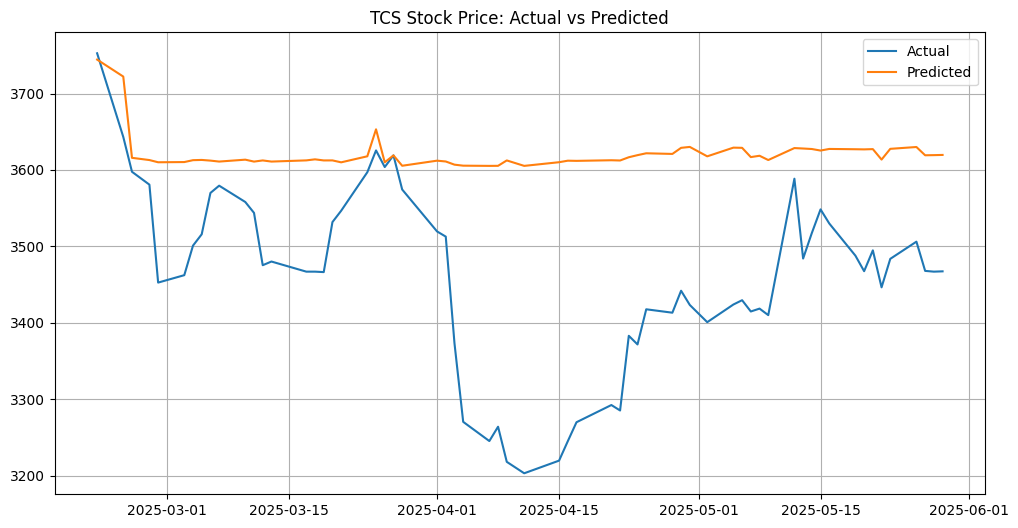

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'].iloc[-len(y_test):], y_test, label="Actual")
plt.plot(df['Date'].iloc[-len(y_test):], y_pred, label="Predicted")
plt.title("TCS Stock Price: Actual vs Predicted")
plt.legend()
plt.grid(True)
plt.show()


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ta.trend import MACD
from ta.momentum import RSIIndicator
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import pickle
import os


In [17]:
# now we have to train linear regression model
model = RandomForestRegressor(n_estimators=300, max_depth=12, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(max_depth=12, n_estimators=300, random_state=42)

In [18]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


MAE: 149.24
RMSE: 184.02
R² Score: -1.52


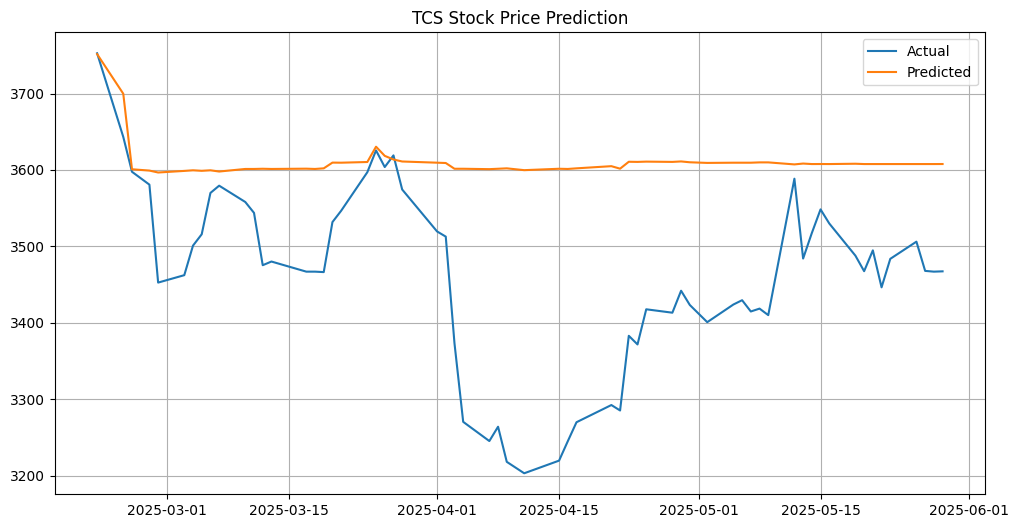

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'].iloc[-len(y_test):], y_test, label='Actual')
plt.plot(df['Date'].iloc[-len(y_test):], y_pred, label='Predicted')
plt.title("TCS Stock Price Prediction")
plt.legend()
plt.grid()
plt.show()


😓 Even after switching to Random Forest, the model performance is still very poor:

MAE: ₹149.24 → High average error

R²: -1.52 → Worse than a straight horizontal guess



In [20]:
os.makedirs('../models', exist_ok=True)
with open('../models/tcs.pkl', 'wb') as f:
    pickle.dump(model, f)
print("✅ Model saved as tcs.pkl")


✅ Model saved as tcs.pkl
